In [1]:
import os
import subprocess
import sys

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [2]:
input_file = "CKC_dataset2.csv"
data = pd.read_csv(input_file, header=0)

sys.path.insert(0, os.path.abspath('../'))
import knnmodule

In [3]:
#give K a proper value
k=11

data.head()
data = data[data.columns.drop(['id'])]
data = data.replace('?', np.nan)
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
def isNaN(string):
    return string != string
def encode(column):
    values = []
    encodedColumn = []
    for element in column:
        if not isNaN(element):
            if element not in values:
               values.append(element)
            encodedColumn.append(values.index(element))
        else:
            encodedColumn.append(element)
    return encodedColumn

In [5]:
columnsToBeEncoded = ['rbc','pc','pcc','ba', 'htn', 'cad','dm','appet','pe','ane','class']
dataEncoded = data
for column in columnsToBeEncoded:
    dataEncoded[column] = encode(dataEncoded[column])
dataEncoded


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,0.0,0.0,0.0,121,...,44,7800,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7,50,1.02,4,0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0
2,62,80,1.01,2,3,0.0,0.0,0.0,0.0,423,...,31,7500,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0
3,48,70,1.005,4,0,0.0,1.0,1.0,0.0,117,...,32,6700,3.9,0.0,1.0,0.0,1.0,1.0,1.0,0
4,51,80,1.01,2,0,0.0,0.0,0.0,0.0,106,...,35,7300,4.6,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,0.0,0.0,0.0,0.0,140,...,47,6700,4.9,1.0,1.0,0.0,0.0,0.0,0.0,1
396,42,70,1.025,0,0,0.0,0.0,0.0,0.0,75,...,54,7800,6.2,1.0,1.0,0.0,0.0,0.0,0.0,1
397,12,80,1.02,0,0,0.0,0.0,0.0,0.0,100,...,49,6600,5.4,1.0,1.0,0.0,0.0,0.0,0.0,1
398,17,60,1.025,0,0,0.0,0.0,0.0,0.0,114,...,51,7200,5.9,1.0,1.0,0.0,0.0,0.0,0.0,1


In [6]:
imputer = KNNImputer(n_neighbors=k)
dataComplete = imputer.fit_transform(dataEncoded)
X = dataComplete[:,:24]
y = dataComplete[:,24]

In [7]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
vals = [clf.feature_importances_]

featureImportance = pd.DataFrame( vals, columns = data.columns.drop(['class']))
featureImportance.sort_values(by=0, ascending=False, axis=1)


,sg,rbc,al,dm,htn,hemo,pcv,pc,appet,rbcc,...,sc,su,bgr,sod,pcc,pot,age,wbcc,cad,ba
0,0.139957,0.123302,0.119009,0.101788,0.09791,0.093213,0.060691,0.04945,0.038513,0.029593,...,0.013127,0.012004,0.011609,0.010314,0.008733,0.005731,0.005553,0.004367,0.003417,0.001629


In [8]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(400, 8)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test_rf, y_train, y_test_rf = train_test_split(X, y, test_size=0.33)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

y_predicted_rf = rfc.predict(X_test_rf)
acc_RF = accuracy_score(y_test_rf, y_predicted_rf)
acc_RF

0.9924242424242424

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33)

lrc = LogisticRegression(max_iter=600)
lrc.fit(X_train, y_train)

y_predicted_log = lrc.predict(X_test)
acc_LOG = accuracy_score(y_test, y_predicted_log)
acc_LOG

0.9621212121212122

In [11]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

y_predicted_svm = clf.predict(X_test)
acc_SVM = accuracy_score(y_test, y_predicted_svm)
acc_SVM

0.9318181818181818

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

acc_score = []
predicted_bulk = []
sqrt_k = int(sqrt(np.size(data,0)))
for i in range(1,sqrt_k,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    predicted_bulk.append(y_predicted)
    acc = accuracy_score(y_test, y_predicted)
    acc_score.append(acc) 
    print('Accuracy value for k = ' , i , 'is:', acc)

Accuracy value for k =  1 is: 0.9545454545454546
Accuracy value for k =  3 is: 0.9393939393939394
Accuracy value for k =  5 is: 0.9393939393939394
Accuracy value for k =  7 is: 0.9393939393939394
Accuracy value for k =  9 is: 0.9242424242424242
Accuracy value for k =  11 is: 0.9242424242424242
Accuracy value for k =  13 is: 0.9318181818181818
Accuracy value for k =  15 is: 0.9318181818181818
Accuracy value for k =  17 is: 0.9242424242424242
Accuracy value for k =  19 is: 0.9166666666666666


In [13]:
array = np.asarray(acc_score)
max_val = np.ndarray.max(array)
val = np.where(array==max_val)[0][0]
chosenK = val*2+1
y_predicted_knn = predicted_bulk[val]
acc_KNN = max_val
chosenK

1

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1)
clf.fit(X_train, y_train)

y_predicted_nb = clf.predict(X_test)
acc_NB = accuracy_score(y_test, y_predicted_nb)
acc_NB

0.8863636363636364

In [15]:
from sklearn.neural_network import MLPClassifier
acc_score = []
predicted_bulk = []

sqrt_k = int(sqrt(np.size(data,0)))
for i in range(1,31):
    model = MLPClassifier(hidden_layer_sizes = i, max_iter=2500)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    acc = accuracy_score(y_test, y_predicted)
    acc_score.append(acc) 
    print('Accuracy value for k = ' , i , 'is:', acc)

Accuracy value for k =  1 is: 0.6439393939393939
Accuracy value for k =  2 is: 0.9242424242424242
Accuracy value for k =  3 is: 0.9166666666666666
Accuracy value for k =  4 is: 0.8939393939393939
Accuracy value for k =  5 is: 0.9166666666666666
Accuracy value for k =  6 is: 0.9318181818181818
Accuracy value for k =  7 is: 0.9242424242424242
Accuracy value for k =  8 is: 0.9242424242424242
Accuracy value for k =  9 is: 0.9242424242424242
Accuracy value for k =  10 is: 0.9166666666666666
Accuracy value for k =  11 is: 0.9166666666666666
Accuracy value for k =  12 is: 0.9393939393939394
Accuracy value for k =  13 is: 0.9318181818181818
Accuracy value for k =  14 is: 0.9318181818181818
Accuracy value for k =  15 is: 0.9242424242424242
Accuracy value for k =  16 is: 0.9393939393939394
Accuracy value for k =  17 is: 0.9090909090909091
Accuracy value for k =  18 is: 0.9242424242424242
Accuracy value for k =  19 is: 0.9242424242424242
Accuracy value for k =  20 is: 0.9242424242424242
Accuracy 

In [16]:
fnn_array = np.asarray(acc_score)
max_val = np.ndarray.max(fnn_array)
chosenK = np.where(fnn_array==max_val)[0][0]+1
acc_FNN = max_val
chosenK

12

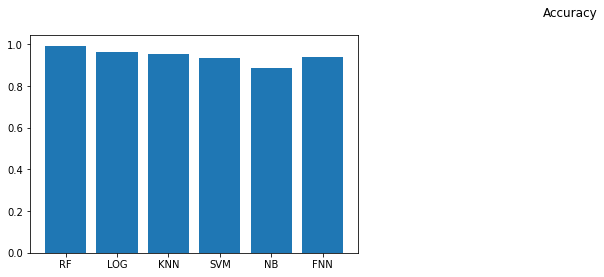

In [25]:
names = ['RF', 'LOG', 'KNN', 'SVM','NB','FNN']
values = [acc_RF,acc_LOG, acc_KNN, acc_SVM, acc_NB, acc_FNN]

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Accuracy')
plt.show()

In [18]:
#Final model 

In [19]:
def get_notckc_probability(array):
    probab = []
    for x in array:
        probab.append(x[1])
    return probab
def get_2D_array(l1,l2):
    array = []
    for i in range(len(l1)):
        array.append([l1[i],l2[i]])
    return array
def activationFunction(prob1,prob2,w):
    return w[0]+prob1*w[1]+prob2*w[2]
def prediction(trainingSet, w):
    y = activationFunction(trainingSet[0],trainingSet[1], w)
    if y > 0:
        activation = 1
    else:
        activation = 0            
    return activation
def train(trainingSet, labels, weights, learning_rate):
    for inputs, label in zip(trainingSet, labels):
            predictionValue = prediction(inputs, weights)
            weights[1] += learning_rate * (label - predictionValue) * inputs[0]
            weights[2] += learning_rate * (label - predictionValue) * inputs[1]
            weights[0] += learning_rate * (label - predictionValue) #bias
    return weights
def accuracy(trainingSet, labels, weights):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for inputs, label in zip(trainingSet, labels):
        predictedValue = prediction(inputs, weights)
        if predictedValue == 0 and label == 0:
            TP+=1
        elif predictedValue == 1 and label == 0:
            FN+=1
        elif predictedValue == 0 and label == 1:
            FP+=1
        elif predictedValue == 1and label == 1:
            TN+=1
    return (TP+TN)/(TP+FN+FP+TN)
    

In [20]:
notckc_prob_rf = rfc.predict_proba(X_test_rf)
notckc_prob_log = lrc.predict_proba(X_test)

l1 = get_notckc_probability(notckc_prob_rf)
l2 =get_notckc_probability(notckc_prob_log)

#new training data
probs = get_2D_array(l1,l2)
weights = np.zeros(3)
weights = train(probs, y_test,weights,0.1)
accuracy(probs, y_test, weights)

0.9618320610687023

In [21]:
def metric (y_predicted, y_true):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for predictedValue, label in zip(y_predicted, y_true):
        if predictedValue == 0 and label == 0:
            TP+=1
        elif predictedValue == 1 and label == 0:
            FN+=1
        elif predictedValue == 0 and label == 1:
            FP+=1
        elif predictedValue == 1and label == 1:
            TN+=1
    acc = (TP+TN)/(TP+FN+FP+TN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(FP+TN)
    precision = TP/(TP+FP)
    F1 = 2 * (precision*sensitivity)/(precision+sensitivity)
    return acc, sensitivity, specificity, F1     

In [22]:
Acc, SENS, SPEC, F1 = metric(y_predicted_rf, y_test_rf)
print("RF: Acc", Acc,"Sensitivity", SENS,"Specificity", SPEC," F1", F1)
Acc, SENS, SPEC, F1 = metric(y_predicted_log, y_test)
print("LOG: Acc", Acc,"Sensitivity", SENS,"Specificity", SPEC," F1", F1)
Acc, SENS, SPEC, F1 = metric(y_predicted_knn, y_test)
print("KNN: Acc", Acc,"Sensitivity", SENS,"Specificity", SPEC," F1", F1)
Acc, SENS, SPEC, F1 = metric(y_predicted_nb, y_test)
print("NB: Acc", Acc,"Sensitivity", SENS,"Specificity", SPEC," F1", F1)
Acc, SENS, SPEC, F1 = metric(y_predicted_svm, y_test)
print("SVM: Acc", Acc,"Sensitivity", SENS,"Specificity", SPEC," F1", F1)

RF: Acc 0.9924242424242424 Sensitivity 1.0 Specificity 0.9803921568627451  F1 0.9938650306748467
LOG: Acc 0.9694656488549618 Sensitivity 0.9647058823529412 Specificity 0.9782608695652174  F1 0.9761904761904762
KNN: Acc 0.9618320610687023 Sensitivity 0.9411764705882353 Specificity 1.0  F1 0.9696969696969697
NB: Acc 0.8931297709923665 Sensitivity 0.8705882352941177 Specificity 0.9347826086956522  F1 0.9135802469135802
SVM: Acc 0.9389312977099237 Sensitivity 0.9058823529411765 Specificity 1.0  F1 0.9506172839506173
